In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df['species']=np.where(df['species']=='Iris-setosa',0,df['species'])

In [7]:
df['species']=np.where(df['species']=='Iris-versicolor',1,df['species'])
df['species']=np.where(df['species']=='Iris-virginica',2,df['species'])

In [8]:
df['species'] = df['species'].astype('int')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['species'].unique()

array([0, 1, 2])

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [12]:
dups=df.duplicated()
dups.sum()

3

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
dups=df.duplicated()
dups.sum()

0

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


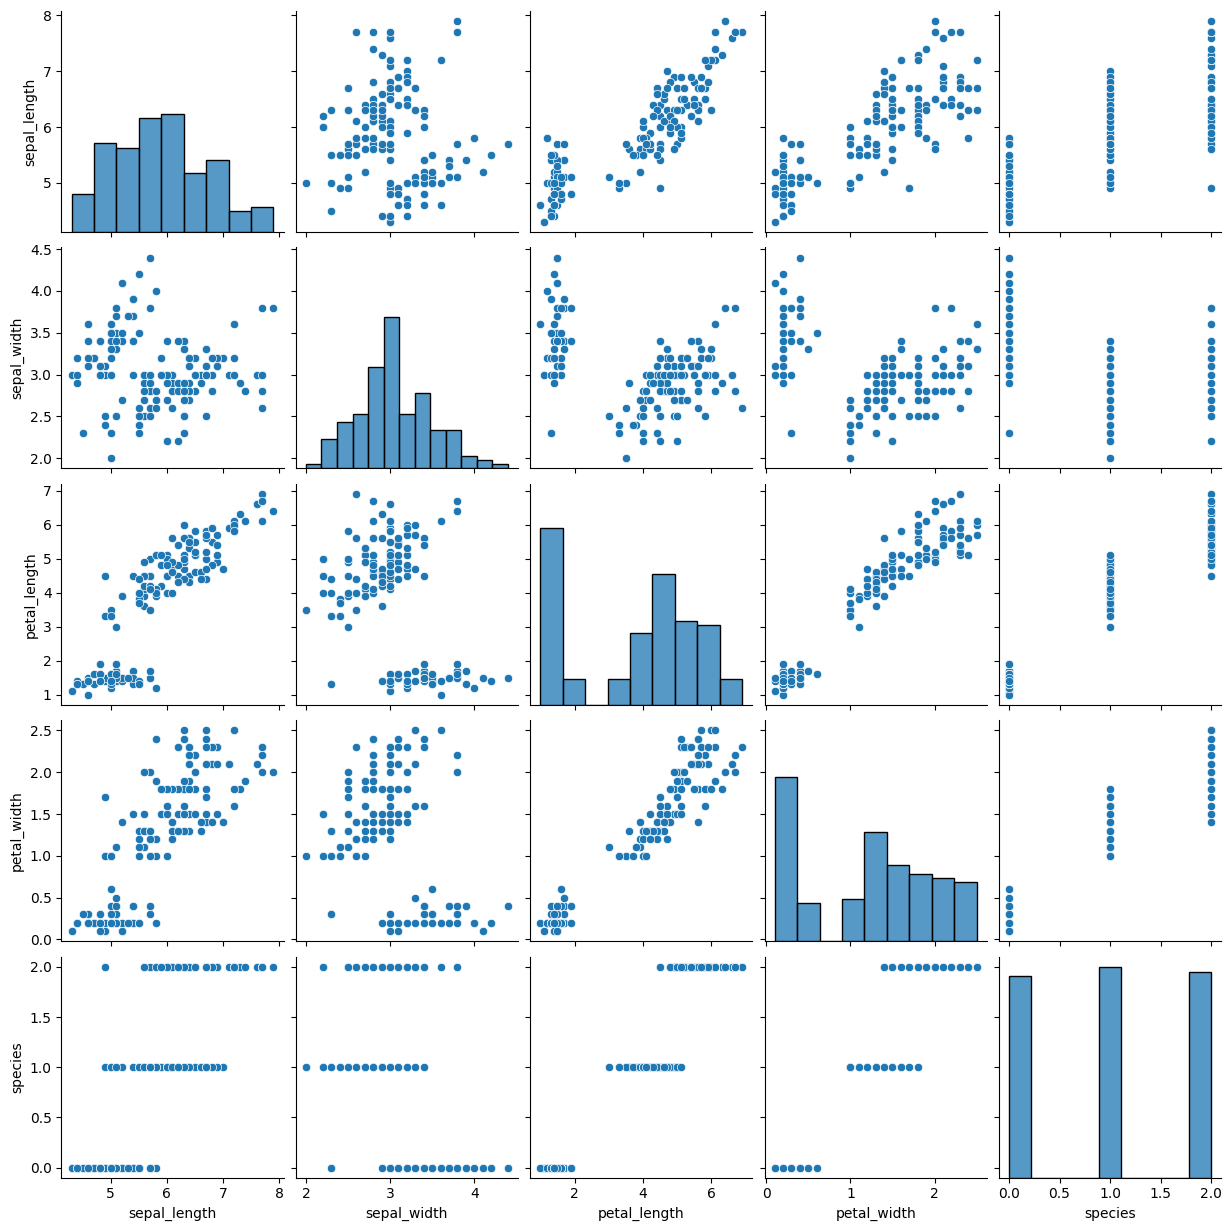

In [16]:
sns.pairplot(data=df)

<Axes: >

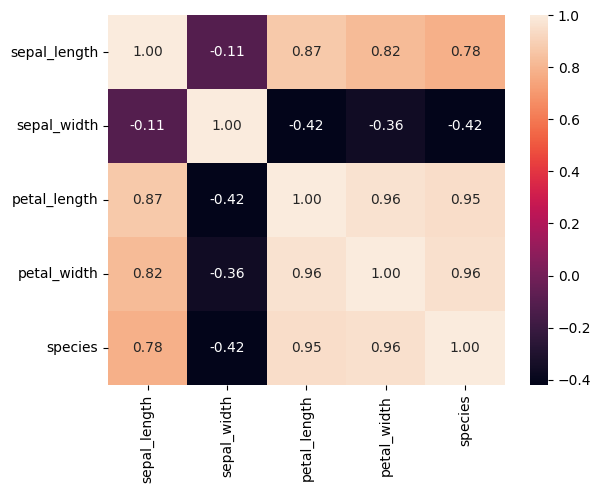

In [17]:
cm=df.corr()
sns.heatmap(cm,fmt='.2f',annot=True)

#### Model Training

In [18]:
### Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
x=df.drop(columns='species', axis=1)
y=df.pop('species')

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
model=LogisticRegression()

In [22]:
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=model.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [24]:
y_pred_train=model.predict(x_train)
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      0.94      0.96        34
           2       0.94      0.97      0.96        35

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



In [25]:
from collections import Counter
counter=Counter(y)
counter

Counter({1: 50, 2: 49, 0: 48})

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')


Fold 1: Accuracy = 0.93
Fold 2: Accuracy = 0.97
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.97
Mean Accuracy: 0.96
Standard Deviation: 0.01


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [27]:
###Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=dtree.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [30]:
y_pred_train=dtree.predict(x_train)
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        35

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



In [31]:
### Pruning descision tree because owerfitting
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [32]:
y_pred=dtree.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [33]:
y_pred_train=dtree.predict(x_train)
class_rep = classification_report(y_train, y_pred_train)
print("Classification Report:Train Data")
print(class_rep)

Classification Report:Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.94      0.97        34
           2       0.95      1.00      0.97        35

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102



In [34]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(dtree, x, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 0.90
Fold 2: Accuracy = 0.97
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 0.93
Mean Accuracy: 0.95
Standard Deviation: 0.03


In [35]:
from sklearn.feature_selection import RFECV
model = LogisticRegression()
rfecv = RFECV(estimator=model, cv=5)

rfecv.fit(x, y)
selected_features = x.columns[rfecv.support_]
optimal_num_features = rfecv.n_features_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [36]:
print("Optimal Number of Features:", optimal_num_features)
print("Selected Features:")
print(selected_features)

Optimal Number of Features: 2
Selected Features:
Index(['petal_length', 'petal_width'], dtype='object')


In [37]:
x.drop(columns='sepal_length',inplace=True)
x.drop(columns='sepal_width',inplace=True)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=model.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [40]:
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
y_pred=dtree.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Modle performance didn't change even after keeping ony selected feature given by RFECV. The main reason is because the dataset is very small hence generalisation is not possible. 

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # For classification
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # For regression

# Fit the model to the training data
rf_model.fit(x_train, y_train)



RandomForestClassifier(random_state=42)

In [43]:
# Make predictions on the test data
y_pred = rf_model.predict(x_test)
class_rep = classification_report(y_test, y_pred)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [44]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.2f}')

# Calculate and print the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')

Fold 1: Accuracy = 0.93
Fold 2: Accuracy = 0.97
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 0.97
Mean Accuracy: 0.96
Standard Deviation: 0.01
